In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

In [2]:
wide = Table.read("Master_AGN_Catalog.downselected.wide.v1.1.fits")

In [3]:
med = Table.read("Master_AGN_Catalog.downselected.medium.v1.1.fits")

In [4]:
no_r = Table.read("Master_AGN_Catalog.downselected.no_r_regions.v1.1.fits")

In [5]:
survey_name = ["wide","medium","no r-band"]
def plot_band(filt):
    
    fig, ax = plt.subplots(1, figsize=(10,8))
    
    m_bright = int(np.min(wide[filt]))
    m_faint  = int(np.max(med[filt][med[filt]<99.]))+1
    bin_size = 0.25
    bins = np.arange(m_bright, m_faint+0.1*bin_size, bin_size)
    
    print("In {}:".format(filt))
    for k,tab in enumerate([wide, med, no_r]):
        tab_use = tab[tab[filt]<99.]
        print("{:.0f}% are detected in the {} survey.".format(len(tab_use)/len(tab)*100, 
                                                             survey_name[k]))
        ax.hist(tab[filt], bins=bins, histtype='step', density=True, label=survey_name[k])
        
    ax.legend(fontsize=18)
    ax.set_xlabel('Magnitude',fontsize=18)
    ax.set_ylabel('Density',fontsize=18)
    
    ax.text(0.1, 0.9, filt, transform=ax.transAxes,fontsize=18)
        
    plt.show() 
    
    return 
    

In mag_auto_g:
97% are detected in the wide survey.
97% are detected in the medium survey.
90% are detected in the no r-band survey.


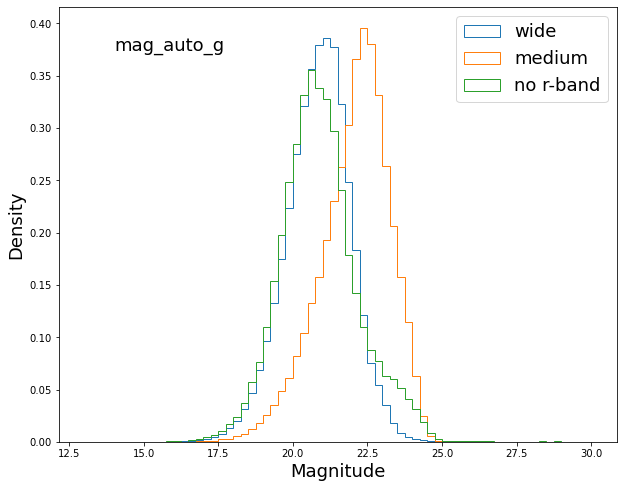

In mag_auto_r:
100% are detected in the wide survey.
100% are detected in the medium survey.
0% are detected in the no r-band survey.


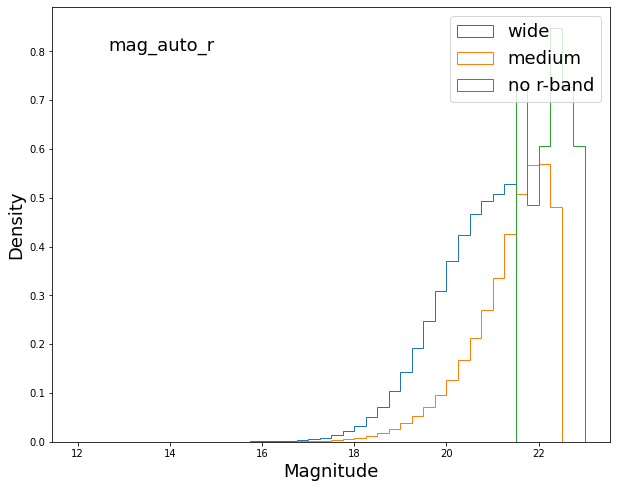

In mag_auto_i:
97% are detected in the wide survey.
92% are detected in the medium survey.
95% are detected in the no r-band survey.


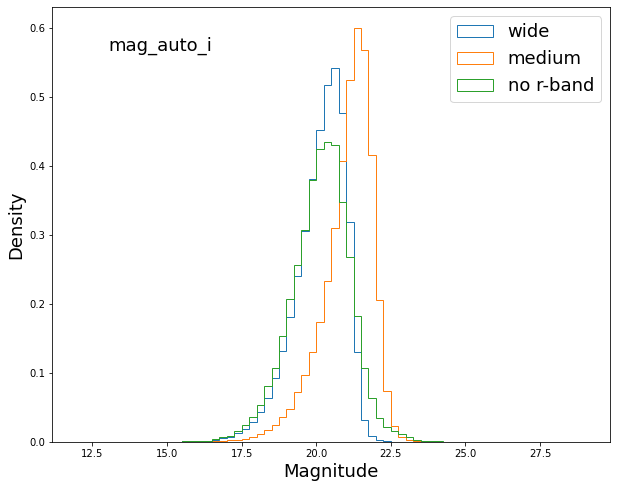

In mag_auto_z:
93% are detected in the wide survey.
99% are detected in the medium survey.
54% are detected in the no r-band survey.


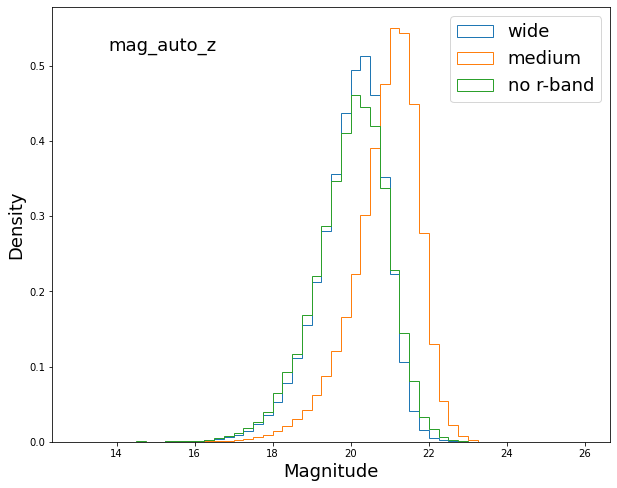

In [6]:
for band in ['mag_auto_g', 'mag_auto_r', 'mag_auto_i', 'mag_auto_z']:
    plot_band(band)
